In [118]:
# -*- coding: utf-8 -*-
"""
Created on Sun Nov 28 21:34:15 2021

@author: imdineshgrewal@gmail.com
"""
#Import libraries 
#import numpy as np
import pandas as pd

# dataset
dataset = pd.read_csv('dataset/stocks/news_data_history.csv',encoding = "ISO-8859-1")
dataset.head()


,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,2000-01-06,1,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,2000-01-07,1,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,...,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft


In [119]:
#Training & testing datset
trainingData = dataset[(dataset['Date'] < '20150101')]
testData = dataset[(dataset['Date'] > '20141231')]

In [120]:
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier


def preprocessing(df):
    # Drop date column from both trainingData & testData
    df.reset_index(drop=True, inplace=True)
    data = df.iloc[:,2:27] 
    data.head()
    
    # Change column name 1,2,3,4 ----- len(x.columns)
    columnList = [i+1 for i in range(len(data.columns))]
    data.columns = columnList

    # REMOVE regular expressions from news data
    data.replace("[^a-zA-Z]"," ",regex=True, inplace=True)

    # Function Convertng headlines to lower case
    for index in data.columns:
        data[index]=data[index].str.lower()

    # Combine all the headlines
    headlines = data[data.columns[:]].apply(lambda x: ','.join(x.dropna().astype(str)),axis=1)
    
    # Normalization
    lm = WordNetLemmatizer()

    corpus = []
    for i in range(0, len(headlines)):
        review = headlines[i]
        review = review.split()
        #lemmatization
        review = [lm.lemmatize(word) for word in review]

        review = ' '.join(review)
        corpus.append(review)
        
    y = df['Label']

    
    return corpus,y

In [121]:
#Train data
x_train,y_train = preprocessing(trainingData)

# creating the bag of words model
cv = CountVectorizer(ngram_range=(2,2)) #1420

# Creating the TF IDF
#from sklearn.feature_extraction.text import TfidfVectorizer
#cv = TfidfVectorizer()
x_train = cv.fit_transform(x_train)

In [122]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200,criterion='entropy')
news_model = rf.fit(x_train,y_train)

In [123]:
#Test data set
x_test,y_test = preprocessing(testData)
x_test = cv.transform(x_test)

In [124]:
# Now, let's see the predictions

y_pred = news_model.predict(x_test)

#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_m = confusion_matrix(y_test, y_pred)
print(confusion_m)

[[141  45]
 [  8 184]]


C:\Users\datal\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Precision : 0.803 / Recall : 0.958 / fscore : 0.874 / Accuracy: 85.97883598


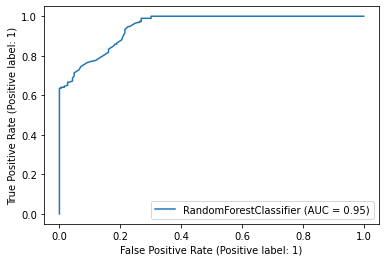

In [125]:
#I would be using predict function and calculating Precision, Recall , f- score, and Accuracy measure also.
#Accuracy and ROC curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_recall_fscore_support as score

plot_roc_curve(news_model, x_test, y_test)

precision,recall,fscore,support =score(y_test,y_pred,pos_label=1, average ='binary')
print('Precision : {} / Recall : {} / fscore : {} / Accuracy: {}'.format(round(precision,3),round(recall,3),round(fscore,3),round((y_pred==y_test).sum()/len(y_test) * 100,8)))
